In [1]:
%matplotlib inline

<div class="document" id="medial-axis-skeletonization">
<h1 class="title">Medial axis skeletonization</h1>
<p>The medial axis of an object is the set of all points having more than one
closest point on the object's boundary. It is often called the <strong>topological
skeleton</strong>, because it is a 1-pixel wide skeleton of the object, with the same
connectivity as the original object.</p>
<p>Here, we use the medial axis transform to compute the width of the foreground
objects. As the function <tt class="docutils literal">medial_axis</tt> (<tt class="docutils literal">skimage.morphology.medial_axis</tt>)
returns the distance transform in addition to the medial axis (with the keyword
argument <tt class="docutils literal">return_distance=True</tt>), it is possible to compute the distance to
the background for all points of the medial axis with this function. This gives
an estimate of the local width of the objects.</p>
<p>For a skeleton with fewer branches, there exists another skeletonization
algorithm in <tt class="docutils literal">skimage</tt>: <tt class="docutils literal">skimage.morphology.skeletonize</tt>, that computes
a skeleton by iterative morphological thinnings.</p>
</div>


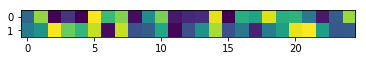

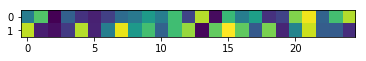

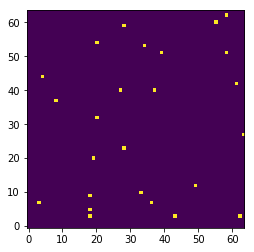

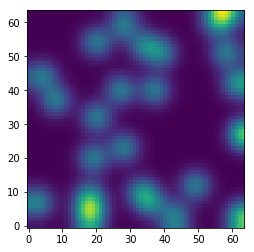

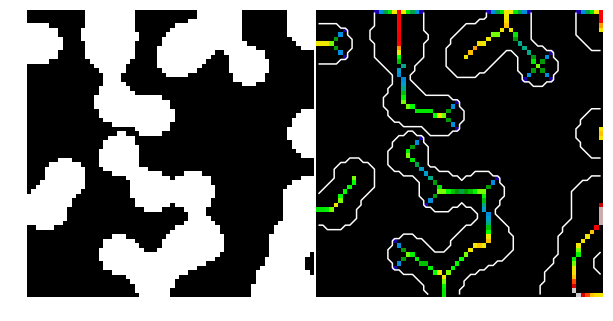

In [15]:
import numpy as np
from scipy import ndimage
from skimage.morphology import medial_axis
import matplotlib.pyplot as plt


def microstructure(l=256):
    """
    Synthetic binary data: binary microstructure with blobs.

    Parameters
    ----------

    l: int, optional
        linear size of the returned image

    """
    n = 5
    x, y = np.ogrid[0:l, 0:l]
    mask_outer = (x - l/2)**2 + (y - l/2)**2 < (l/2)**2
    mask = np.zeros((l, l))
    generator = np.random.RandomState()
    points = l * generator.rand(2, n**2)
    plt.figure()
    plt.imshow(points)
    generator = np.random.RandomState(1)
    points1 = l * generator.rand(2, n**2)
    plt.figure()
    plt.imshow(points1)
    mask[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
    plt.figure()
    plt.imshow(mask,origin = 'lower')
    mask = ndimage.gaussian_filter(mask, sigma=l/(4.*n))
    plt.figure()
    plt.imshow(mask,origin = 'lower')
    return mask > mask.mean()

data = microstructure(l=64)

# Compute the medial axis (skeleton) and the distance transform
skel, distance = medial_axis(data, return_distance=True)

# Distance to the background for pixels of the skeleton
dist_on_skel = distance * skel

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.imshow(data, cmap=plt.cm.gray, interpolation='nearest')
ax1.axis('off')
ax2.imshow(dist_on_skel, cmap=plt.cm.spectral, interpolation='nearest')
ax2.contour(data, [0.5], colors='w')
ax2.axis('off')

fig.subplots_adjust(hspace=0.01, wspace=0.01, top=1, bottom=0, left=0, right=1)
plt.show()